In [62]:
import numpy as np
import pandas as pd

In [63]:
df = pd.read_csv('CustomerChurn.csv')

In [64]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

# Preprocessing

In [66]:
# Phân loại dữ liệu
# Chuyển dữ liệu sang catgory

features = ['Complains','Charge  Amount','Age Group','Tariff Plan','Status','Churn']
def convert_cat(dataframe,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(df,features)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Call  Failure            3150 non-null   int64   
 1   Complains                3150 non-null   category
 2   Subscription  Length     3150 non-null   int64   
 3   Charge  Amount           3150 non-null   category
 4   Seconds of Use           3150 non-null   int64   
 5   Frequency of use         3150 non-null   int64   
 6   Frequency of SMS         3150 non-null   int64   
 7   Distinct Called Numbers  3150 non-null   int64   
 8   Age Group                3150 non-null   category
 9   Tariff Plan              3150 non-null   category
 10  Status                   3150 non-null   category
 11  Age                      3150 non-null   int64   
 12  Customer Value           3150 non-null   float64 
 13  Churn                    3150 non-null   category
dtypes: categ

Distribution of category features

In [68]:
df.describe(include =["category"])

,Complains,Charge Amount,Age Group,Tariff Plan,Status,Churn
count,3150,3150,3150,3150,3150,3150
unique,2,11,5,2,2,2
top,0,0,3,1,1,0
freq,2909,1768,1425,2905,2368,2655


Exploratory Data Analysis

In [69]:
df["Churn"].value_counts().to_frame()

,Churn
0,2655
1,495


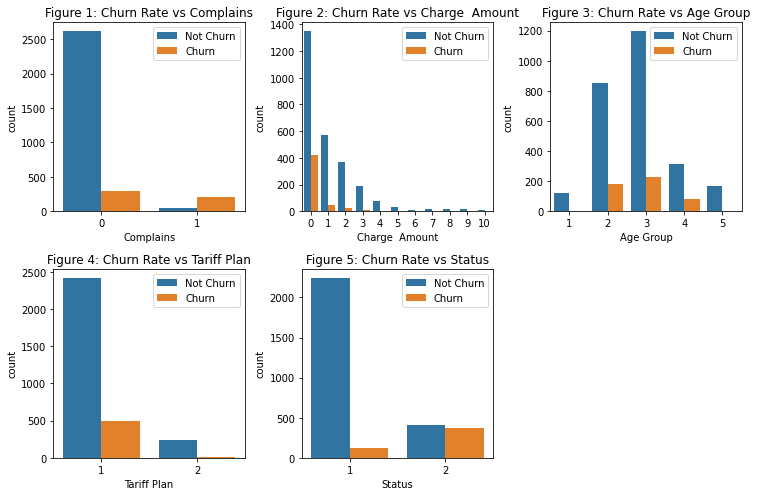

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Complains', 'Charge  Amount', 'Age Group', 'Tariff Plan', 'Status']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index of plot
        if i< len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=df, x = cols[i], hue= "Churn", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Churn Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Churn', 'Churn'])
            
ax.flat[-1].set_visible(False) # remove last
plt.tight_layout()
plt.show()

['Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']


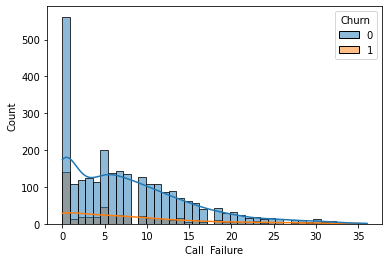

In [71]:
# distribution of numeric 
sns.histplot(data=df, x='Call  Failure',hue = 'Churn', bins = 40, kde=True)
num_features = list(df.select_dtypes(['float','int']).columns)
print((num_features))

IndexError: index 2 is out of bounds for axis 0 with size 2

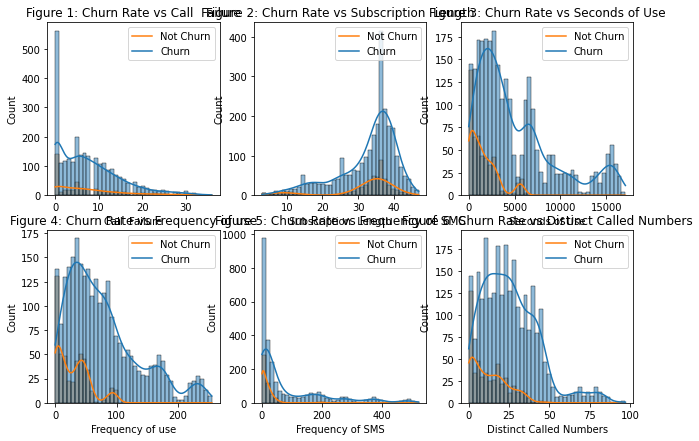

In [72]:
n_rowss = 3
n_colss = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rowss):
    for c in range(0, n_colss):
        i = r*n_colss + c # index of plot
        if i< len(num_features):
            ax_i = ax[r,c]
            sns.histplot(data=df, x=num_features[i] ,hue = 'Churn', bins = 40,kde = True, ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Churn Rate vs {num_features[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Churn', 'Churn'])
            
ax.flat[-1].set_visible(False) # remove last
plt.tight_layout()
plt.show()

In [74]:
# lấy list các loại biến dữ liệu cat và num
cat_features = list(df.select_dtypes('category').columns)
num_features = list(df.select_dtypes(['float','int']).columns)
features_cols = cat_features + num_features

In [76]:
X = df[features_cols]
Y = df['Churn']

Pipeline xử lí dữ liệu

In [77]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Pipeline xử lí dữ liệu Category
cat_pl = Pipeline(steps= [
    ('Imputer', SimpleImputer(strategy = 'most_frequent')), # Thay thế missing value
    ('onehot', OneHotEncoder()), # mã hóa dữ liệu thành vecto onehot
])

In [78]:
# Pipeline xử lí dữ liệu Numeric
num_pl = Pipeline(steps = [
    ('Imputer', SimpleImputer(strategy = 'median')), # Thay thế missing value bằng median
    ('scaler', StandardScaler())
])

In [79]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pl, num_features),   # áp dụng pipeline cho biến kiể num
    ('cat', cat_pl, cat_features)    # áp dụng pipeline cho biến kiể cat
])

In [81]:
preprocessor.fit(df)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Call  Failure', 'Subscription  Length',
                                  'Seconds of Use', 'Frequency of use',
                                  'Frequency of SMS', 'Distinct Called Numbers',
                                  'Age', 'Customer Value']),
                                ('cat',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Complains', 'Charge  Amount', 'Age Group',
                                  'Tariff Plan', 'Status', 'Churn'])])

In [82]:
df = preprocessor.transform(df)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2)

Model Training

In [85]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
# sklearn Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [86]:
log_reg = LogisticRegression(solver = 'liblinear',max_iter = 1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [87]:
log_reg.score(X_val, Y_val)

1.0

In [88]:
y_pred = log_reg.predict(X_val)

In [89]:
precision_score(Y_val, y_pred), recall_score(Y_val, y_pred)

(1.0, 1.0)

In [90]:
print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       548
           1       1.00      1.00      1.00        82

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



In [91]:
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [92]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
poly_log_reg.fit(poly_features_X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [93]:
poly_log_reg.score(poly_features_X_val,Y_val)

0.8698412698412699

In [94]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=8,random_state=2022)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

In [95]:
decision_tree.score(X_val,Y_val)

1.0

cross validation

In [96]:
from sklearn.model_selection import cross_val_score
log_reg_cv = LogisticRegression(solver='liblinear',max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion ='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, Y, scoring='accuracy',error_score='raise',cv=5)

In [97]:
lr_scores.mean(),lr_scores.std()

(1.0, 0.0)

Baseline Model comparison

In [98]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(max_iter= 12000,random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski',p=2),
    LogisticRegression(solver='liblinear',max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=seed)
    
]


In [100]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X,Y, metrics,cv=5,plot_results=True):
    kfold = StratifiedKFold(cv, shuffle=True,random_state=seed)
    entries=[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,Y,scoring = metrics,cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
            
    cv_df = pd.DataFrame(entries,columns= ['model_name','fold_id','accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name',y ='accuracy_score',data= cv_df,showmeans=True)
        plt.title("Boxplot of Base-line Model Accuracy using 5Fold cross-validaition")
        plt.xticks(rotation=45)
        plt.show()
    
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean,std],axis = 1, ignore_index = True)
    baseline_results.columns = ['Mean','Standard Deviation']
    
    # Sort by accuracy
    baseline_results.sort_values(by = ['Mean'], ascending =  False, inplace = True) 
    
    return baseline_results
    
generate_baseline_results(models, X,Y, metrics='accuracy',cv=5,plot_results=False)        

D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 f

,Mean,Standard Deviation
model_name,,
AdaBoostClassifier,1.000000,0.000000
DecisionTreeClassifier,1.000000,0.000000
ExtraTreesClassifier,1.000000,0.000000
LinearSVC,1.000000,0.000000
LogisticRegression,1.000000,0.000000
RandomForestClassifier,1.000000,0.000000
KNeighborsClassifier,0.866032,0.009431
SVC,0.842857,0.000000
XGBClassifier,NaN,NaN


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
import numpy as np

# Tính fbeta score
def fbeta(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

metric = make_scorer(fbeta)
# list các mô hình được lựa chọn
models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

# Xác định KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('classifier', model)]
  )

  scores = cross_val_score(completed_pl, X_train, Y_train, scoring=metric, cv=cv, n_jobs=-1)
  all_scores.append(scores)

In [109]:
from sklearn.base import BaseEstimator
class ClassifierSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestClassifier(),
  ):
      
      self.estimator = estimator

  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self

  def predict(self, X, y=None):
      return self.estimator.predict(X)

  def predict_proba(self, X):
      return self.estimator.predict_proba(X)

  def score(self, X, y):
      return self.estimator.score(X, y)

In [110]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("clf", ClassifierSwitcher())]
)

In [111]:
parameters = [
    {
        'clf__estimator': [LogisticRegression()], # SVM if hinge loss / logreg if log loss
        'clf__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf__estimator__max_iter': [50, 80],
        'clf__estimator__tol': [1e-4]
    },
    {
        'clf__estimator': [RandomForestClassifier()],
        'clf__estimator__n_estimators': [50, 100],
        'clf__estimator__max_depth': [5, 10],
        'clf__estimator__criterion': ('gini', 'entropy')
    },
]

In [113]:
metric = make_scorer(fbeta)
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, Y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_28596\2437355445.py", line 11, in fit
  File "D:\anaconda3\envs\my_env1\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Call  '
                                                                          'Failure',
                                                                          'Subscription  '
                                                                          'Length',
                                                           

In [120]:
gscv.best_estimator_
                                  

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Call  Failure',
                                                   'Subscription  Length',
                                                   'Seconds of Use',
                                                   'Frequency of use',
                                                   'Frequency of SMS',
                                                   'Distinct Called Numbers',
                                                   'Age', 'Customer Value']),
                                                 ('cat',
       

In [121]:
gscv.best_params_

{'clf__estimator': LogisticRegression(max_iter=50),
 'clf__estimator__max_iter': 50,
 'clf__estimator__penalty': 'l2',
 'clf__estimator__tol': 0.0001}

In [122]:
gscv.best_score_

1.0